In [207]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
global_temp = pd.read_csv("C:/Users/sjtri/OneDrive/Documents/Data Analytics/Climate Change/GlobalTemperatures.csv")


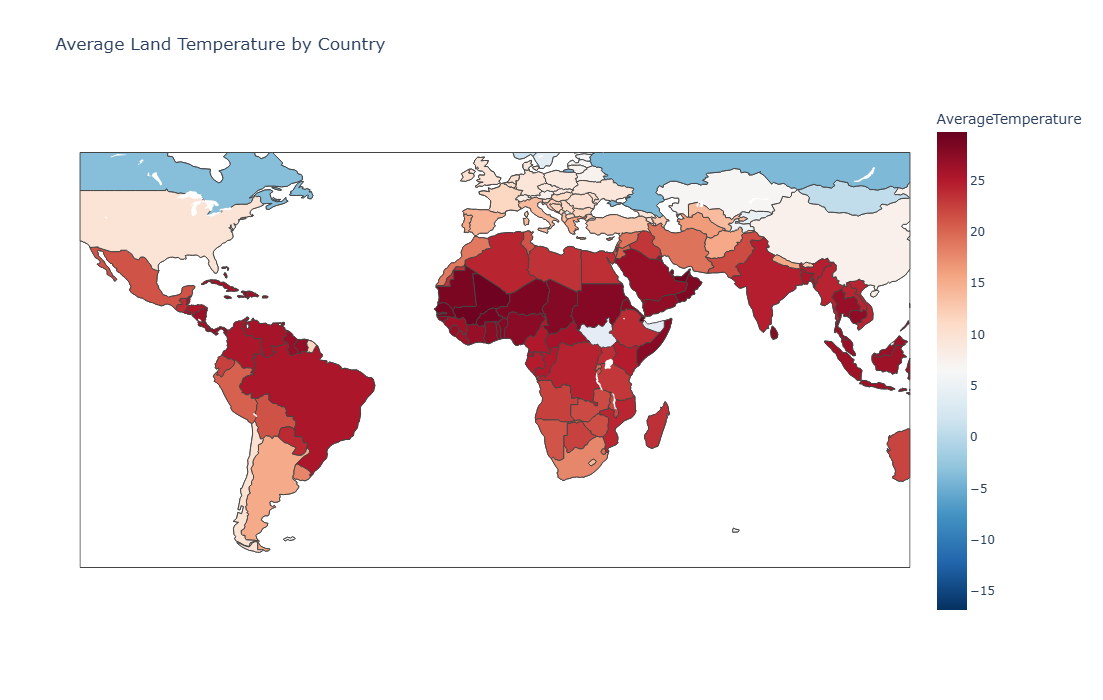

In [210]:
country_temp = pd.read_csv("C:/Users/sjtri/OneDrive/Documents/Data Analytics/Climate Change/GlobalLandTemperaturesByCountry.csv")
country_temp['dt'] = pd.to_datetime(country_temp['dt'])

recent_temp = country_temp[country_temp['dt'] >= '2000-01-01']

avg_temp_country = recent_temp.groupby('Country')['AverageTemperature'].mean().reset_index()
avg_temp_country = avg_temp_country.dropna()

fig = px.choropleth(avg_temp_country,
                    locations="Country",
                    locationmode="country names",
                    color="AverageTemperature",
                    color_continuous_scale="RdBu_r",
                    title="Average Land Temperature by Country")

fig.update_layout(width=1200, height=700)

fig.update_geos(
    projection_scale=1.5,  
    center=dict(lat=0, lon=0))

fig.show()

In [211]:
# drop unnecessary columns
global_temp = global_temp[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

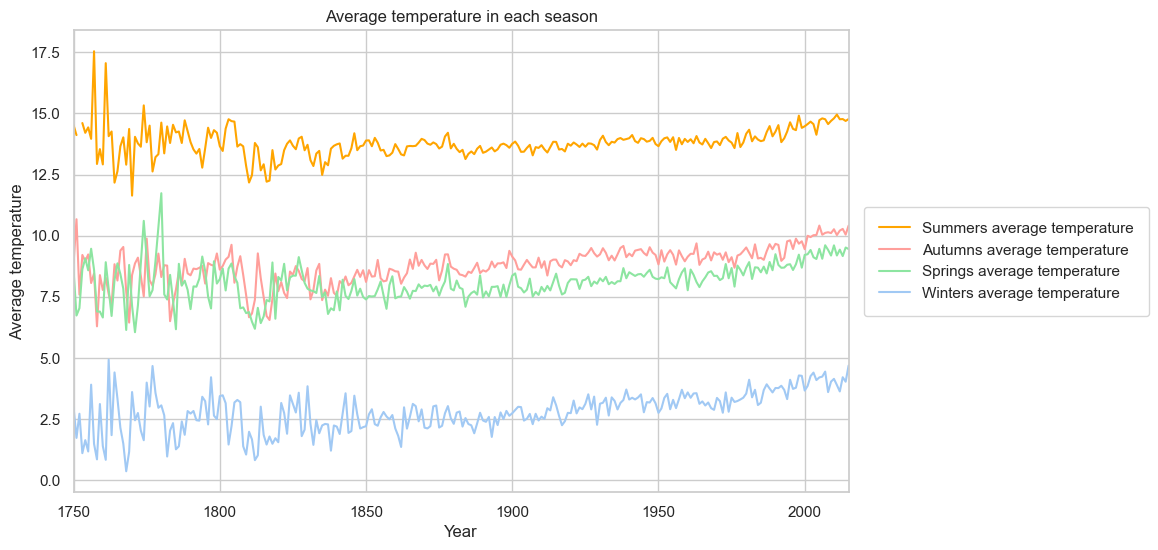

In [212]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

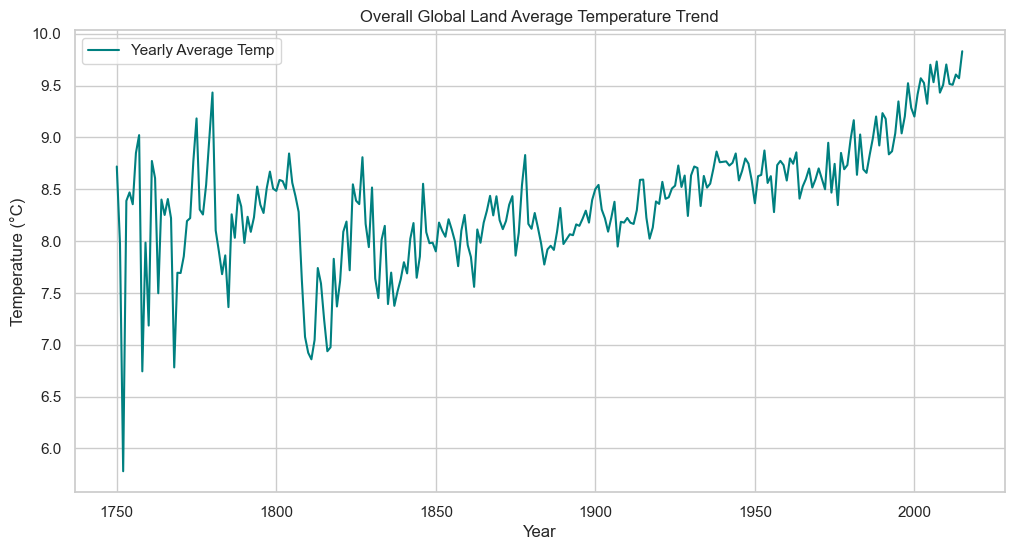

In [213]:
#Overall Global Land Average Temperature Trend
yearly_avg_temp = global_temp.groupby('year')['LandAverageTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, label='Yearly Average Temp', color='teal')
plt.title('Overall Global Land Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

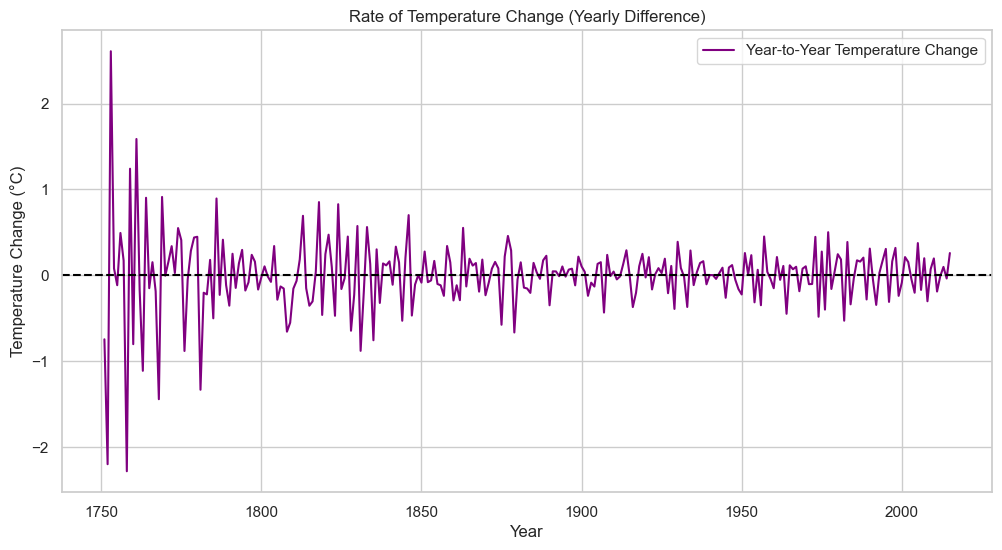

In [214]:
#Rate of Temperature Change (Yearly Difference)
yearly_temp_change = yearly_avg_temp.diff()

plt.figure(figsize=(12, 6))
plt.plot(yearly_temp_change.index, yearly_temp_change.values, label='Year-to-Year Temperature Change', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Rate of Temperature Change (Yearly Difference)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.legend()
plt.show()

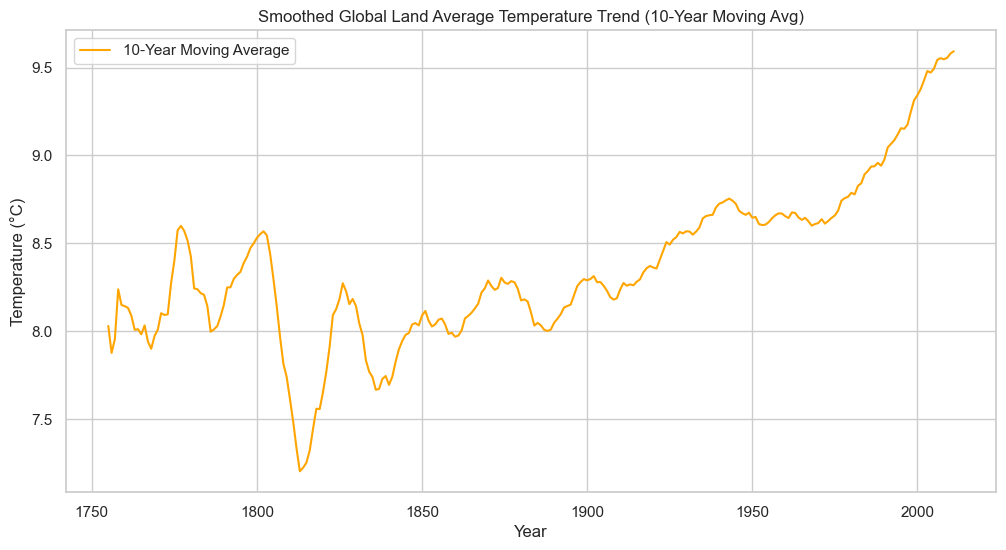

In [215]:
# Moving Average Smoother (10-year moving average)
moving_avg_temp = yearly_avg_temp.rolling(window=10, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(moving_avg_temp.index, moving_avg_temp.values, label='10-Year Moving Average', color='orange')
plt.title('Smoothed Global Land Average Temperature Trend (10-Year Moving Avg)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

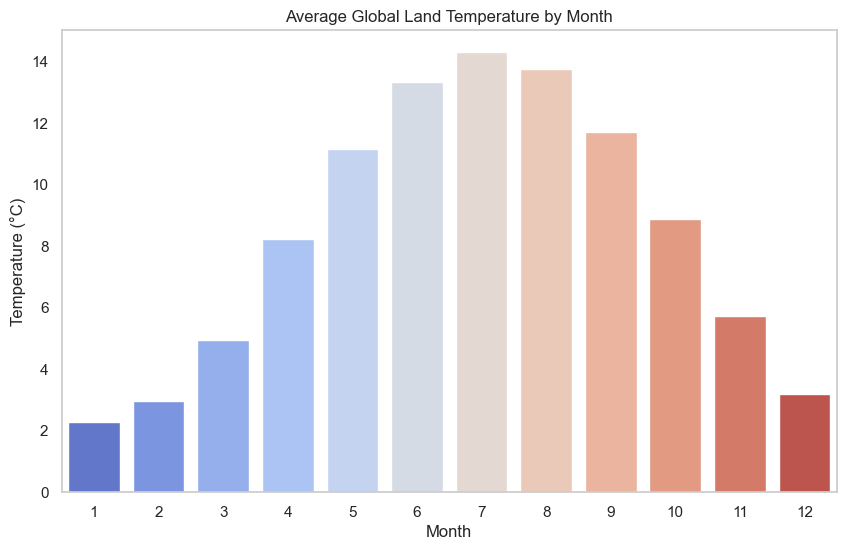

In [216]:
#Month-wise Average Temperature
monthly_avg_temp = global_temp.groupby('month')['LandAverageTemperature'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, palette='coolwarm')
plt.title('Average Global Land Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y')
plt.show()

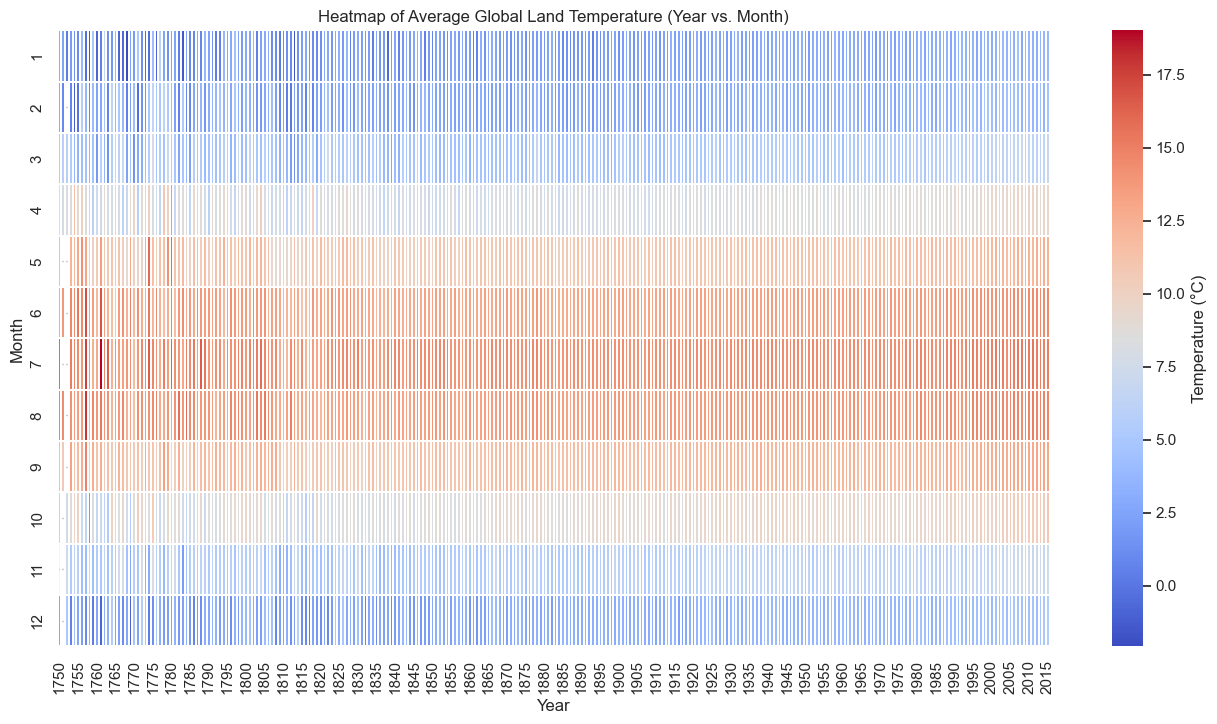

In [217]:
#Heatmap of Average Temperature by Year and Month
heatmap_data = global_temp.pivot_table(values='LandAverageTemperature', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'}, linewidths=0.05)
plt.title('Heatmap of Average Global Land Temperature (Year vs. Month)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()# Load temperature by country
country_temp = pd.read_csv("C:/Users/sjtri/OneDrive/Documents/Data Analytics/Climate Change/GlobalLandTemperaturesByCountry.csv")